In [1]:
import numpy as np
import pandas as pd
from os.path import join
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# Consistent settings
RANDOM_STATE = 42
data_dir = "/Users/macminim4/PyCharmMiscProject/Aiffel/jan/data/"

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv')

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

print('Acta non Verba!')

Acta non Verba!


In [2]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [3]:
#날짜를 정수형 데이터로
train['date'] =train['date'].apply(lambda i: i[:6]).astype(int)
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [4]:
# price 열을 삭제 하고 별도로 새변수 y에 저장
y = train['price']
del train['price']
del train['id']  # id 컬럼 삭제 (예측에 불필요)
print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [5]:
test['date'] =test['date'].apply(lambda i: i[:6]).astype(int)
del test['id']
print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [6]:
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

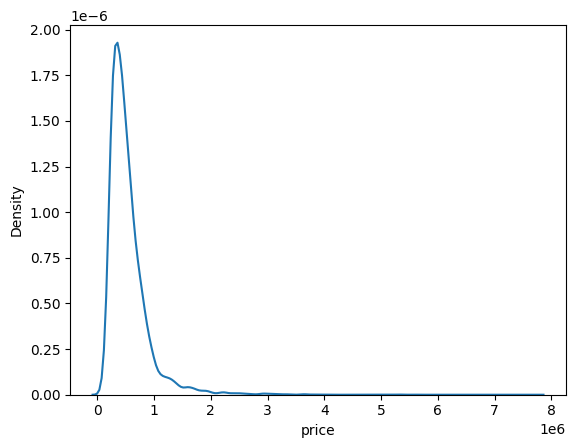

In [7]:
# seaborn의 kdeplot으로 y분포 확인
sns.kdeplot(y)
plt.show()

price는 왼쪽으로 크게 치우쳐 있는 형태를 보입니다.
따라서 y는 np.log1p() 함수를 통해 로그 변환을 해주고, 나중에 모델이 값을 예측한 후에 다시 np.expm1()을 활용해서 되돌리겠습니다.
 np.expm1()은 np.log1p()과는 반대로 각 원소 x마다 exp(x)-1의 값을 반환해 줍니다.

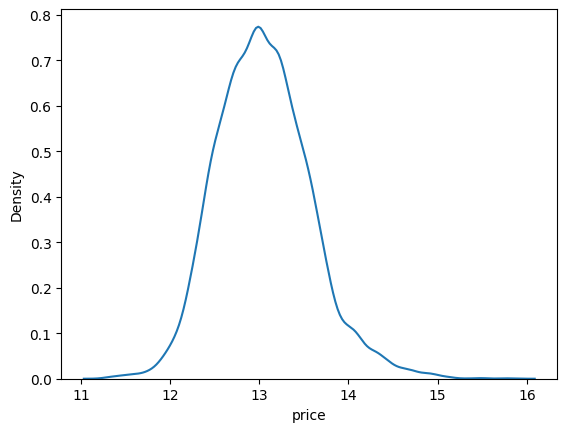

In [8]:
import numpy as np
y = np.log1p(y)
sns.kdeplot(y)
plt.show()

#### info() 로 데이터 형태 확인 

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
print("Sempre")

Sempre


대회에서 점수를 매기는 것과 같은 평가 척도인 RMSE를 계산하기 위해 다음과 같은 함수를 만들어놓겠습니다.
한 가지 주의해야 할 것은, y_test나 y_pred는 위에서 np.log1p()로 변환이 된 값이기 때문에 원래 데이터의 단위에 맞게 되돌리기 위해 np.expm1()을 추가해야 한다는 점입니다.
exp로 다시 변환해서 mean_squared_error를 계산한 값에 np.sqrt를 취하면 RMSE 값을 얻을 수 있겠죠!

In [11]:
# RMSE 함수만들기
def rmse(y_test,Y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test),np.expm1(y_pred)))

print("CURSO PLENO!!")

CURSO PLENO!!


#### 모델가져 오기(머신러닝 라이브러리들 )

In [12]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

print('CURSO PLENO!!')

CURSO PLENO!!


#### 모델 인스턴스 생성후 models라는 리스트에 넣어주기

In [13]:
# random_state는 모델초기화나 데이터셋 구성에 사용되는 랜덤 시드값입니다.
# 상단에서 정의한 RANDOM_STATE 사용

gboost = GradientBoostingRegressor(random_state=RANDOM_STATE)
xgboost = XGBRegressor(random_state=RANDOM_STATE)
lightgbm = LGBMRegressor(random_state=RANDOM_STATE)
rdforest = RandomForestRegressor(random_state=RANDOM_STATE)

models = [gboost, xgboost, lightgbm, rdforest]

print("CURSO PLENO!")

CURSO PLENO!


In [14]:
# 각 모델의 이름은 다음과 같이 클래스의 __name__ 속성에 접근해서 얻을 수 있습니다.
gboost.__class__.__name__

'GradientBoostingRegressor'

#### <span style="color:pink"> 이렇게 이름을 접근 하여 for문 안에서 각 모델 별로 학습 및 예측 </span>

In [15]:
df = {}
for model in models :
    # 모델 이름 획득
    model_name = model.__class__.__name__
    # train,test 데이터셋 분리
    # RANDOM_STATE를 사용하여 고정하고 train과 test 셋의 비율은 8:2 로 한다
    X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=RANDOM_STATE, test_size=0.2)

    # 모델 학습
    model.fit(X_train, y_train)

    # 예측
    y_pred = model.predict(X_test)
    # 예측 결과의 rmse값 저장
    df[model_name] = rmse(y_test, y_pred)

# 루프 종료 후 데이터프레임 생성 및 출력
score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
print(score_df)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2298
[LightGBM] [Info] Number of data points in the train set: 12028, number of used features: 19
[LightGBM] [Info] Start training from score 13.047364


                                    RMSE
RandomForestRegressor      140892.542110
GradientBoostingRegressor  134486.116210
XGBRegressor               129606.843091
LGBMRegressor              123071.469729


# 📌 03_11_hyperparameter.ipynb


###  <span style="color : pink"> Intentio Voluntatis </span>

 ## `model`과 `grid_model`의 차이

  ---

  ### 1. `model` - 기본 머신러닝 모델

  ```python
  model = LGBMRegressor(random_state=42)

  - LGBMRegressor: LightGBM 회귀 모델 (기본 설정)
  - 아직 하이퍼파라미터가 튜닝되지 않은 상태
  - "틀"만 만든 것이고, 어떤 설정이 최적인지 모르는 상태

  ---
  2. grid_model - 하이퍼파라미터 탐색 도구

  grid_model = GridSearchCV(model, param_grid=param_grid, ...)

  - GridSearchCV: 여러 하이퍼파라미터 조합을 자동으로 테스트해주는 도구
  - model을 감싸서 최적의 설정을 찾아주는 래퍼(wrapper)

  ---
  3. 전체 프로세스 흐름

  1단계: 탐색할 파라미터 범위 정의
  param_grid = {'n_estimators': [50, 100], 'max_depth': [1, 10]}
  → 총 4가지 조합 (2 × 2)

  ⬇️

  2단계: 기본 모델 생성
  model = LGBMRegressor() — 아직 학습 안 됨, 설정도 기본값

  ⬇️

  3단계: GridSearchCV로 감싸기
  grid_model = GridSearchCV(model, param_grid, cv=5)
  → 4가지 조합 × 5-fold 교차검증 = 20번 학습/평가

  ⬇️

  4단계: 학습 실행
  grid_model.fit(train, y)

  ┌──────┬──────────────┬───────────┬───────────┐
  │ 실험 │ n_estimators │ max_depth │   결과    │
  ├──────┼──────────────┼───────────┼───────────┤
  │  1   │      50      │     1     │ 점수 측정 │
  ├──────┼──────────────┼───────────┼───────────┤
  │  2   │     100      │     1     │ 점수 측정 │
  ├──────┼──────────────┼───────────┼───────────┤
  │  3   │      50      │    10     │ 점수 측정 │
  ├──────┼──────────────┼───────────┼───────────┤
  │  4   │     100      │    10     │ ⭐ 최고!  │
  └──────┴──────────────┴───────────┴───────────┘
  ⬇️

  5단계: 결과 확인
  - grid_model.best_params_ → {'max_depth': 10, 'n_estimators': 100}
  - grid_model.best_score_ → 최고 점수
  - grid_model.cv_results_ → 모든 실험 결과

  ---
  4. 비유로 이해하기
  ┌──────────────────┬──────────────────────────────┐
  │       구분       │             비유             │
  ├──────────────────┼──────────────────────────────┤
  │ model            │ 요리사 (아직 레시피 없음)    │
  ├──────────────────┼──────────────────────────────┤
  │ param_grid       │ 시험해볼 레시피 목록         │
  ├──────────────────┼──────────────────────────────┤
  │ grid_model       │ 요리 대회 심사 시스템        │
  ├──────────────────┼──────────────────────────────┤
  │ grid_model.fit() │ 대회 진행 (모든 조합 테스트) │
  ├──────────────────┼──────────────────────────────┤
  │ best_params_     │ 우승 레시피                  │
  └──────────────────┴──────────────────────────────┘
  ---
  5. 핵심 요약
  ┌───────────────────────┬───────────────────────────┐
  │         model         │        grid_model         │
  ├───────────────────────┼───────────────────────────┤
  │ 단일 설정의 모델      │ 여러 설정을 자동 비교     │
  ├───────────────────────┼───────────────────────────┤
  │ 기본값 또는 수동 설정 │ 최적 설정을 찾아주는 도구 │
  └───────────────────────┴───────────────────────────┘
  ---


In [16]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV


print("PLENIS VELIS")

PLENIS VELIS


In [17]:
param_grid ={
    'n_estimators':[50,100],#사용할 트리의 개수
    'max_depth' : [1,10], # 트리의 깊이 몇단계의 질문 시스템 인가 max값이 정해져 있지는 않다 보통 데이터의 수가 max 너무 많이 하면 과적합 위험
}

Ensemble Model : 여러 개의 모델(머신러닝 알고리즘)을 합쳐서 더 강력한 성능을 내는 기술.
Tree : 앙상블 모델을 구성하는 개별 모델 하나 하나를 가르킴

In [18]:
# !pip install lightgbm
from lightgbm import LGBMRegressor

model = LGBMRegressor(random_state=RANDOM_STATE)
print("Intentio Voluntatis! Plenis Velis!")

Intentio Voluntatis! Plenis Velis!


In [19]:
import pandas as pd
import numpy as np

# train 데이터 로드 및 전처리 (이미 위에서 로드됨, 재로드 필요시 사용)
# train = pd.read_csv(join(data_dir, 'train.csv'))
# y = train['price']
# y = np.log1p(y)  # 로그 변환 (치우친 분포 정규화)
# del train['price']
# del train['id']  # id 컬럼 삭제 (예측에 불필요)
# train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)

print(f"train shape: {train.shape}")
print(f"y 변환 전 예시: 221900 -> 변환 후: {np.log1p(221900):.4f}")

train shape: (15035, 19)
y 변환 전 예시: 221900 -> 변환 후: 12.3100


#### <span style = "color : pink"> GridSearchCV로 최적 설정을 찾다,여러 파라미터 조합을 자동으로 테스트 <span/>

In [20]:
grid_model = GridSearchCV(model, param_grid=param_grid,
                        scoring='neg_mean_squared_error',
                        cv=5, verbose=1, n_jobs=5)

grid_model.fit(train, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2338
[LightGBM] [Info] Number of data points in the train set: 15035, number of used features: 19
[LightGBM] [Info] Start training from score 13.048122


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LGBMRegressor(random_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [1, 10], 'n_estimators': [50, 100]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",5
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displa

In [21]:
# 최적 파라미터 확인
print(grid_model.best_params_)

  # 최적 점수 확인
print(grid_model.best_score_)

{'max_depth': 10, 'n_estimators': 100}
-0.027027144840492612


grid_model.fit 함수를 통해서 4가지 조합에 대한 실험을 모두 마쳤습니다.<br/>
실험에 대한 결과는 다음과 같이 grid_model.cv_results_ 안에 저장됩니다.

In [22]:
grid_model.cv_results_

{'mean_fit_time': array([0.11127377, 0.18243575, 1.15729585, 2.31544223]),
 'std_fit_time': array([0.00034751, 0.0058554 , 0.01989216, 0.11524358]),
 'mean_score_time': array([0.00175209, 0.00146809, 0.00225658, 0.00330167]),
 'std_score_time': array([0.0001139 , 0.00011356, 0.00015002, 0.00022153]),
 'param_max_depth': masked_array(data=[1, 1, 10, 10],
              mask=[False, False, False, False],
        fill_value=999999),
 'param_n_estimators': masked_array(data=[50, 100, 50, 100],
              mask=[False, False, False, False],
        fill_value=999999),
 'params': [{'max_depth': 1, 'n_estimators': 50},
  {'max_depth': 1, 'n_estimators': 100},
  {'max_depth': 10, 'n_estimators': 50},
  {'max_depth': 10, 'n_estimators': 100}],
 'split0_test_score': array([-0.0756974 , -0.05555652, -0.02885847, -0.02665428]),
 'split1_test_score': array([-0.07666447, -0.057876  , -0.03041465, -0.02795896]),
 'split2_test_score': array([-0.07354904, -0.05546079, -0.03068533, -0.02834112]),
 'spl

In [23]:
params = grid_model.cv_results_['params']
params

[{'max_depth': 1, 'n_estimators': 50},
 {'max_depth': 1, 'n_estimators': 100},
 {'max_depth': 10, 'n_estimators': 50},
 {'max_depth': 10, 'n_estimators': 100}]

In [24]:
score = grid_model.cv_results_['mean_test_score']
score

array([-0.07339447, -0.05502043, -0.02917734, -0.02702714])

In [25]:

results = pd.DataFrame(params)
results['score'] = score

results

,max_depth,n_estimators,score
0,1,50,-0.073394
1,1,100,-0.055020
2,10,50,-0.029177
3,10,100,-0.027027


In [26]:
import numpy as np
results['RMSE'] = np.sqrt(-1 * results['score'])
results

,max_depth,n_estimators,score,RMSE
0,1,50,-0.073394,0.270914
1,1,100,-0.055020,0.234564
2,10,50,-0.029177,0.170814
3,10,100,-0.027027,0.164399


In [27]:
results = results.rename(columns={'RMSE': 'RMSLE'})
results

,max_depth,n_estimators,score,RMSLE
0,1,50,-0.073394,0.270914
1,1,100,-0.055020,0.234564
2,10,50,-0.029177,0.170814
3,10,100,-0.027027,0.164399


In [28]:
# 위의 표를 `RMSLE`가 낮은 순서대로 정렬해주세요.

results = results.sort_values('RMSLE')
results

,max_depth,n_estimators,score,RMSLE
3,10,100,-0.027027,0.164399
2,10,50,-0.029177,0.170814
1,1,100,-0.055020,0.234564
0,1,50,-0.073394,0.270914


In [29]:
"""
다음과 같은 과정을 진행할 수 있는 `my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)` 함수를 구현해 보세요.

1. GridSearchCV 모델로 `model`을 초기화합니다.
2. 모델을 fitting 합니다.
3. params, score에 각 조합에 대한 결과를 저장합니다.
4. 데이터 프레임을 생성하고, RMSLE 값을 추가한 후 점수가 높은 순서로 정렬한 `results`를 반환합니다.
"""

def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV 모델로 초기화
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)

    # 모델 fitting
    grid_model.fit(train, y)

    # 결과값 저장
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results['score'] = score

    # RMSLE 값 계산 후 정렬
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results
"""
cv = Cross-Validation (교차 검증) 의 약자입니다.
cv=5는 데이터를 5등분해서 검증한다는 의미입니다.
"""

'\ncv = Cross-Validation (교차 검증) 의 약자입니다.\ncv=5는 데이터를 5등분해서 검증한다는 의미입니다.\n'

In [30]:
print("최적 파라미터:", grid_model.best_params_)
print("최적 점수:", grid_model.best_score_)

최적 파라미터: {'max_depth': 10, 'n_estimators': 100}
최적 점수: -0.027027144840492612


### 12.제출하는 것도,빠르고 깔끔하게<br/>
#### <span style = "color : pink"> 데이터로 부터 패턴을 학습하고 예츨하는 학습모델:LGBMRegressor사용 <span/>


In [31]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],  # Fixed typo: 'man_mepth' -> 'max_depth'
}

model = LGBMRegressor(random_state=RANDOM_STATE)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2332
[LightGBM] [Info] Number of data points in the train set: 12028, number of used features: 19
[LightGBM] [Info] Start training from score 13.050660
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2338
[LightGBM] [Info] Number of data points in the train set: 15035, number of used features: 19
[LightGBM] [Info] Start training from score 13.048122


,max_depth,n_estimators,score,RMSLE
3,10,100,-0.027027,0.164399
2,10,50,-0.029177,0.170814
1,1,100,-0.055020,0.234564
0,1,50,-0.073394,0.270914


In [32]:
# 이해의 편의상 위에서 진행 했던 순위와 파라미터르 확인 해보자
rank_df = pd.DataFrame({
      '순위': grid_model.cv_results_['rank_test_score'],
      'max_depth': grid_model.cv_results_['param_max_depth'],
      'n_estimators': grid_model.cv_results_['param_n_estimators'],
      '평균점수': grid_model.cv_results_['mean_test_score']
})
rank_df.sort_values('순위')

,순위,max_depth,n_estimators,평균점수
3,1,10,100,-0.027027
2,2,10,50,-0.029177
1,3,1,100,-0.055020
0,4,1,50,-0.073394


#### <span style = "color:pink"> 예측 결과에 no.expm1() 을 씌워 스케일로 되돌려야 한다 <span/>

In [33]:
# test 데이터 로드 및 전처리
test = pd.read_csv(join(data_dir, 'test.csv'))
test_id = test['id']  # 제출용 id 저장
del test['id']
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)

print(f"test shape: {test.shape}")

# 최적 파라미터로 모델 학습 및 예측
model = LGBMRegressor(max_depth=10, n_estimators=100, random_state=RANDOM_STATE)
model.fit(train, y)

# 예측 (로그 스케일)
prediction = model.predict(test)

# 원래 스케일로 복원 (np.expm1)
prediction = np.expm1(prediction)

print(f"예측값 샘플: {prediction[:5]}")

test shape: (6468, 19)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2338
[LightGBM] [Info] Number of data points in the train set: 15035, number of used features: 19
[LightGBM] [Info] Start training from score 13.048122


예측값 샘플: [ 506766.66784595  479506.10405112 1345155.15609376  312257.88179592
  333864.49141891]


In [34]:
# sample_submission.csv 파일을 가져와보자
submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


In [35]:
#위의 데이터프레임에 우리의 모델이 예측한 값을 덮어씌우면 제출할 데이터가 완성되겠죠!
submission['price'] = prediction
submission.head()

,id,price
0,15035,5.067667e+05
1,15036,4.795061e+05
2,15037,1.345155e+06
3,15038,3.122579e+05
4,15039,3.338645e+05


In [36]:
#위의 데이터를 csv 파일로 저장하겠습니다.
#단, 앞으로는 많은 실험이 있을 예정이니 파일 이름에 모델의 종류와 위에서 확인했던 RMSLE 값을 넣어주면 제출 파일들이 깔끔하게 관리될 것입니다!
submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, 'lgbm', '0.164399')
submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)

/Users/macminim4/PyCharmMiscProject/Aiffel/jan/data//submission_lgbm_RMSLE_0.164399.csv


#### 위과정을 함수로 정리

In [37]:
"""
아래의 과정을 수행하는 `save_submission(model, train, y, test, model_name, rmsle)` 함수를 구현해 주세요.
1. 모델을 `train`, `y`로 학습시킵니다.
2. `test`에 대해 예측합니다.
3. 예측값을 `np.expm1`으로 변환하고, `submission_model_name_RMSLE_100000.csv` 형태의 `csv` 파일을 저장합니다.
"""

def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

In [38]:
save_submission(model, train, y, test, 'lgbm', rmsle='0.164399')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2338
[LightGBM] [Info] Number of data points in the train set: 15035, number of used features: 19
[LightGBM] [Info] Start training from score 13.048122


/Users/macminim4/PyCharmMiscProject/Aiffel/jan/data//submission_lgbm_RMSLE_0.164399.csv saved!


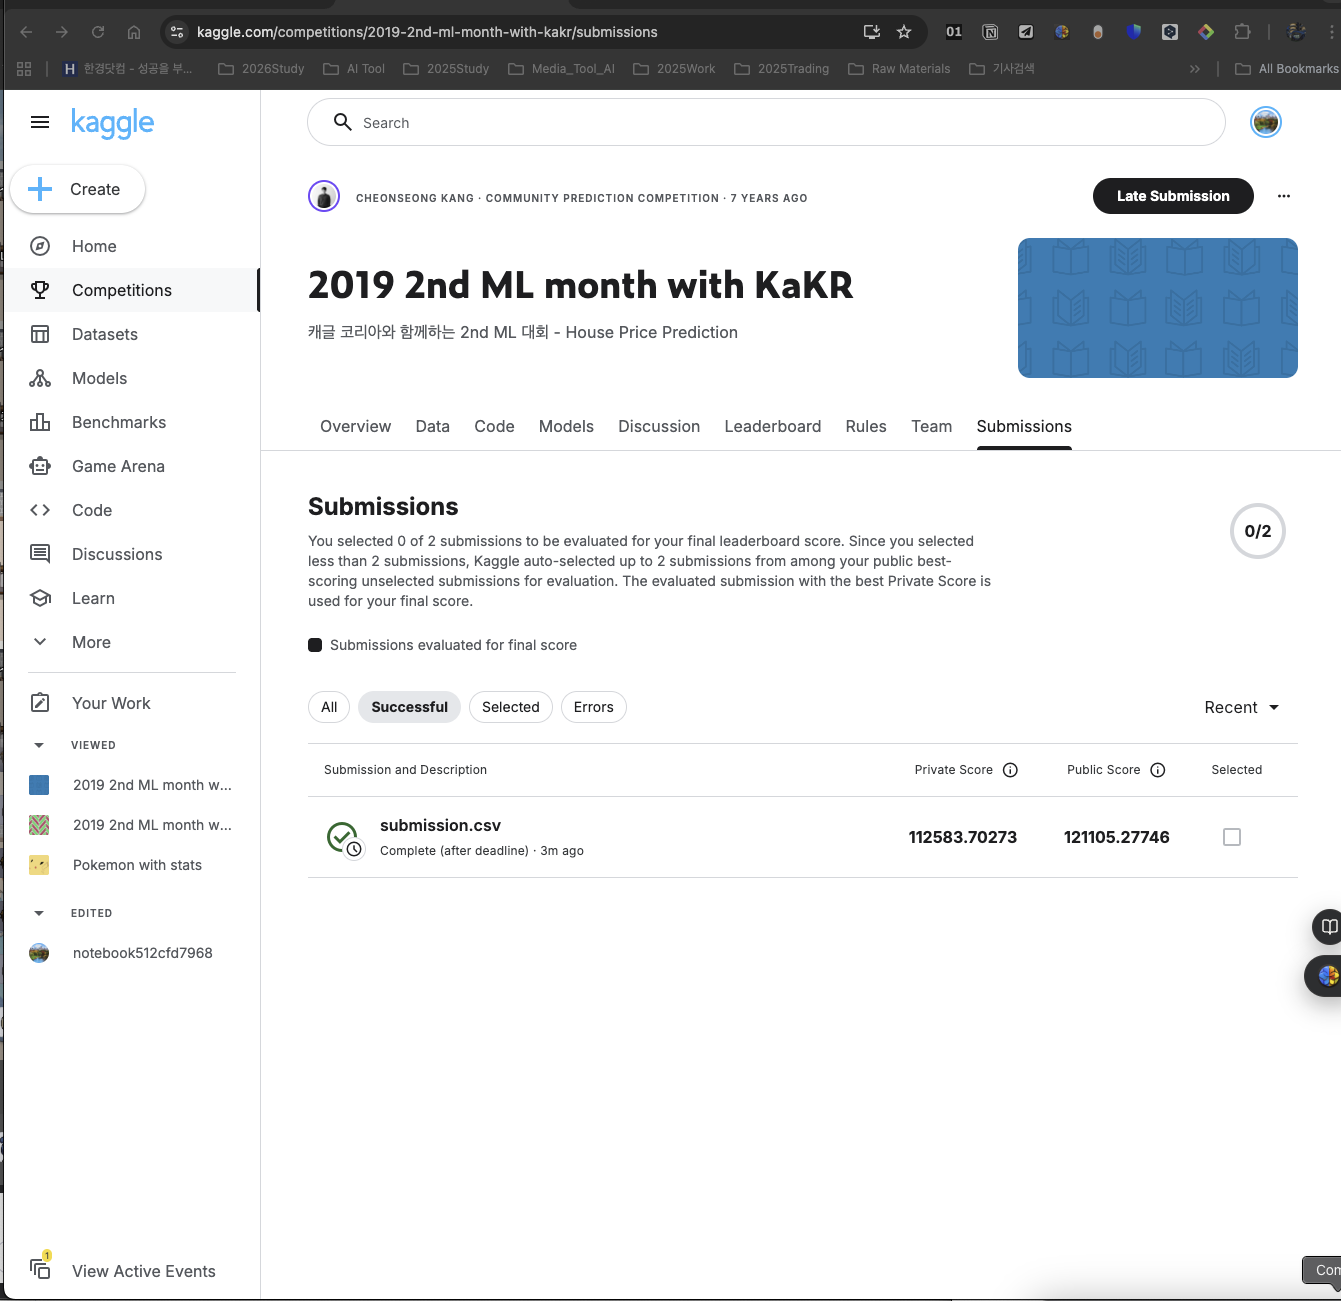

In [5]:
from IPython.display import Image
Image('kaggle_image.png')